In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# __Decision Trees__

### Decision Tree Regressors

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [10]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

dataset

array([['Asset Flip', '100', '1000'],
       ['Text Based', '500', '3000'],
       ['Visual Novel', '1500', '5000'],
       ['2D Pixel Art', '3500', '8000'],
       ['2D Vector Art', '5000', '6500'],
       ['Strategy', '6000', '7000'],
       ['First Person Shooter', '8000', '15000'],
       ['Simulator', '9500', '20000'],
       ['Racing', '12000', '21000'],
       ['RPG', '14000', '25000'],
       ['Sandbox', '15500', '27000'],
       ['Open-World', '16500', '30000'],
       ['MMOFPS', '25000', '52000'],
       ['MMORPG', '30000', '80000']], dtype='<U20')

In [11]:
X = dataset[:,1:2].astype(int)
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [12]:
y = dataset[:,2].astype(int)
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [13]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [14]:
y_pred = regressor.predict([[3750]])

print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



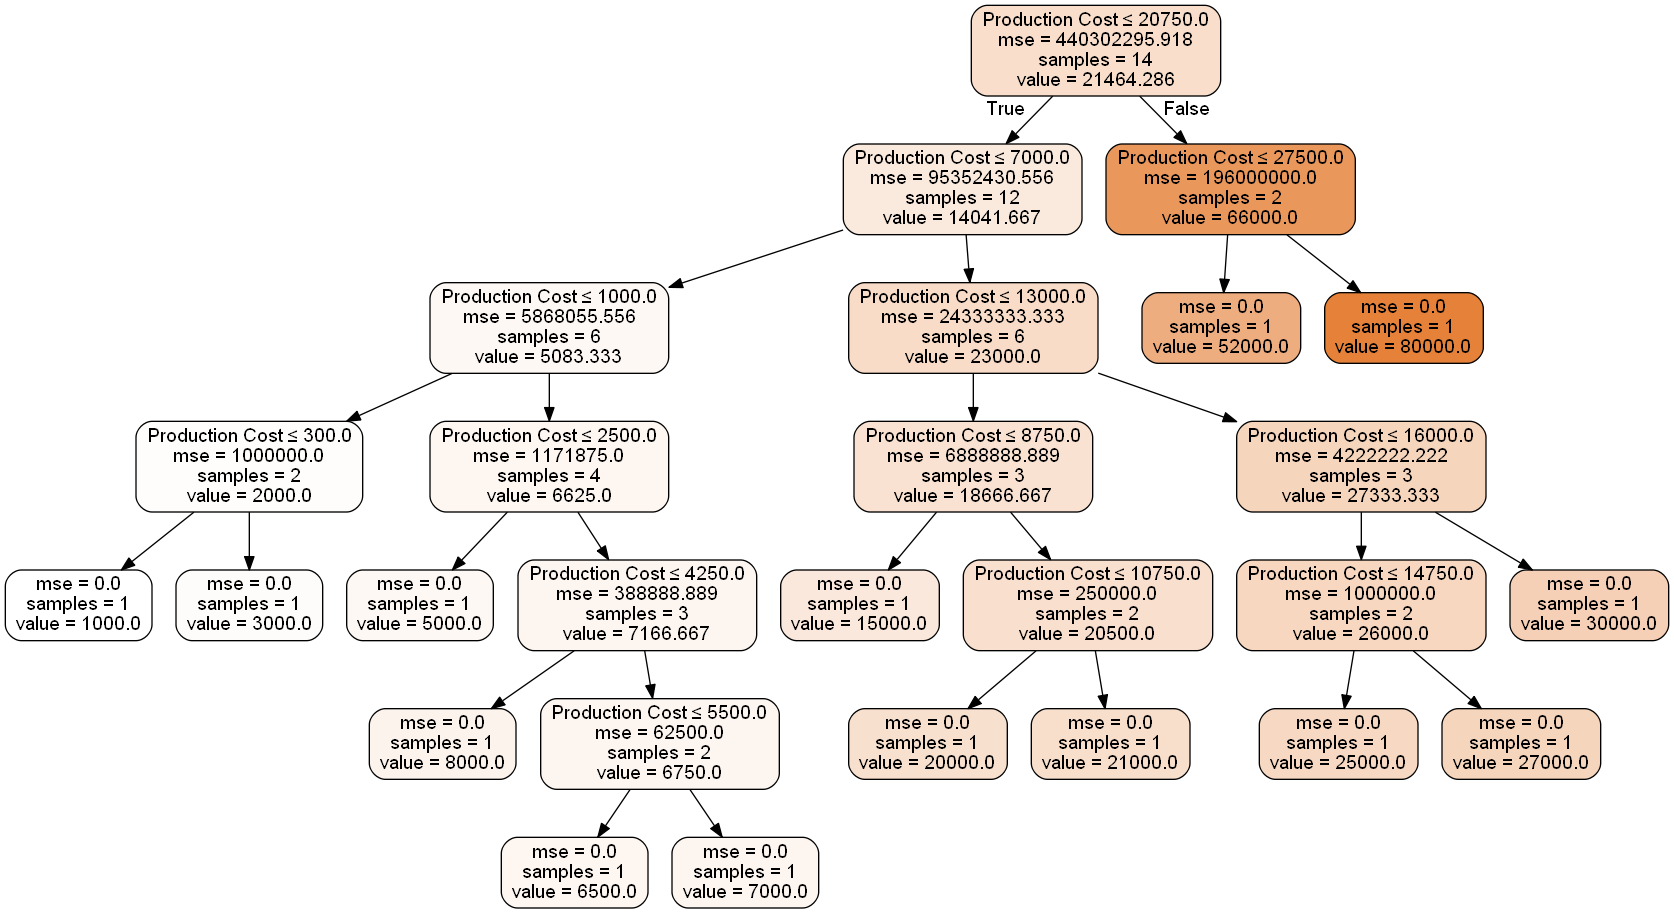

In [15]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = ['Production Cost']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('regression_tree.png')
Image(graph.create_png())